# Module 6: Visualization with Matplotlib & Seaborn


In [2]:
# Imporrting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings

# Warning Filtering
warnings.filterwarnings('ignore')

In [3]:
# Global style settings
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['axes.spines.top']= False
plt.rcParams['axes.spines.right']= False

In [4]:
# Generate random sales data

# Reproducibility
np.random.seed(42)

#Simulate a customer purchase dataset
n = 500
df =  pd.DataFrame({
    'customer_id': range(1, n+1),
    'age': np.random.randint(18, 70, size = n),
    'annual_spend': np.random.exponential(scale = 1500, size = n).round(2),
    'num_purchases': np.random.poisson(lam = 8, size = n),
    'region': np.random.choice(['North', 'South', 'East', 'West'], size = n),
    'cohort_month': np.random.choice(['Jan', 'Feb', 'Mar', 'Apr'], size = n),
    'churn': np.random.choice([0, 1], size = n, p = [0.75, 0.25])
})
df['spend_log'] = np.log1p(df['annual_spend'])
print("Dataset loaded Shape: ", df.shape)

Dataset loaded Shape:  (500, 8)


## 1. Visualaztion Best Practices

Good charts follow key principles

    * Clarity: One message per chart
    * Labeling: Alsways label axes and add titles
    * Color: Use accessible palettes, avoid random colors
    * No chartjunk: Avoid 3D effects, decorative patterns
    * Keep it simple: Less is more
    

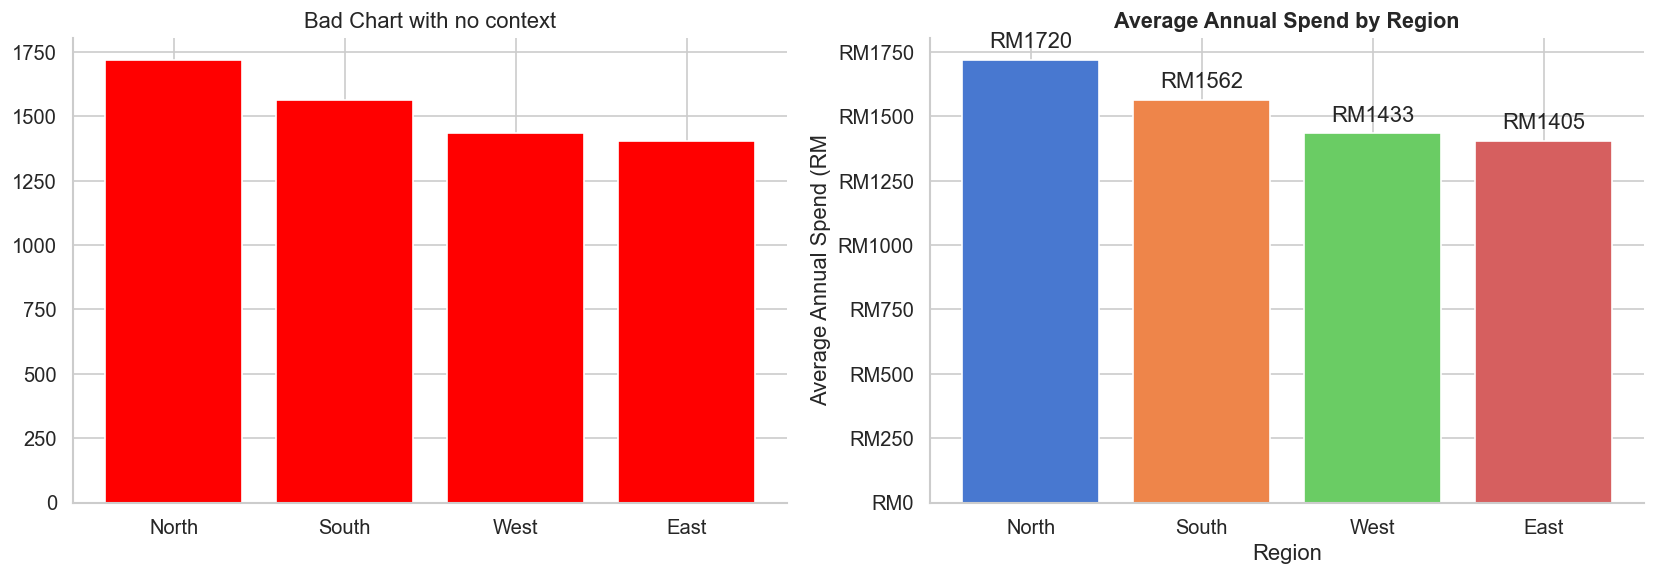

In [5]:
# Bad vs good chart

region_avg = df.groupby('region')['annual_spend'].mean().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# No labels, unclear and bad in general
axes[0].bar(region_avg.index, region_avg.values, color='red')
axes[0].set_title('Bad Chart with no context')

# Initiate the bad chart
bars = axes[1].bar(region_avg.index, region_avg.values, color=sns.color_palette('muted', 4))
axes[1].bar_label(bars, fmt='RM%.0f', padding=5)
axes[1].set_title('Average Annual Spend by Region', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Annual Spend (RM')
axes[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('RM{x:.0f}'))
plt.tight_layout()
plt.show()

## 2. Distribution


In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


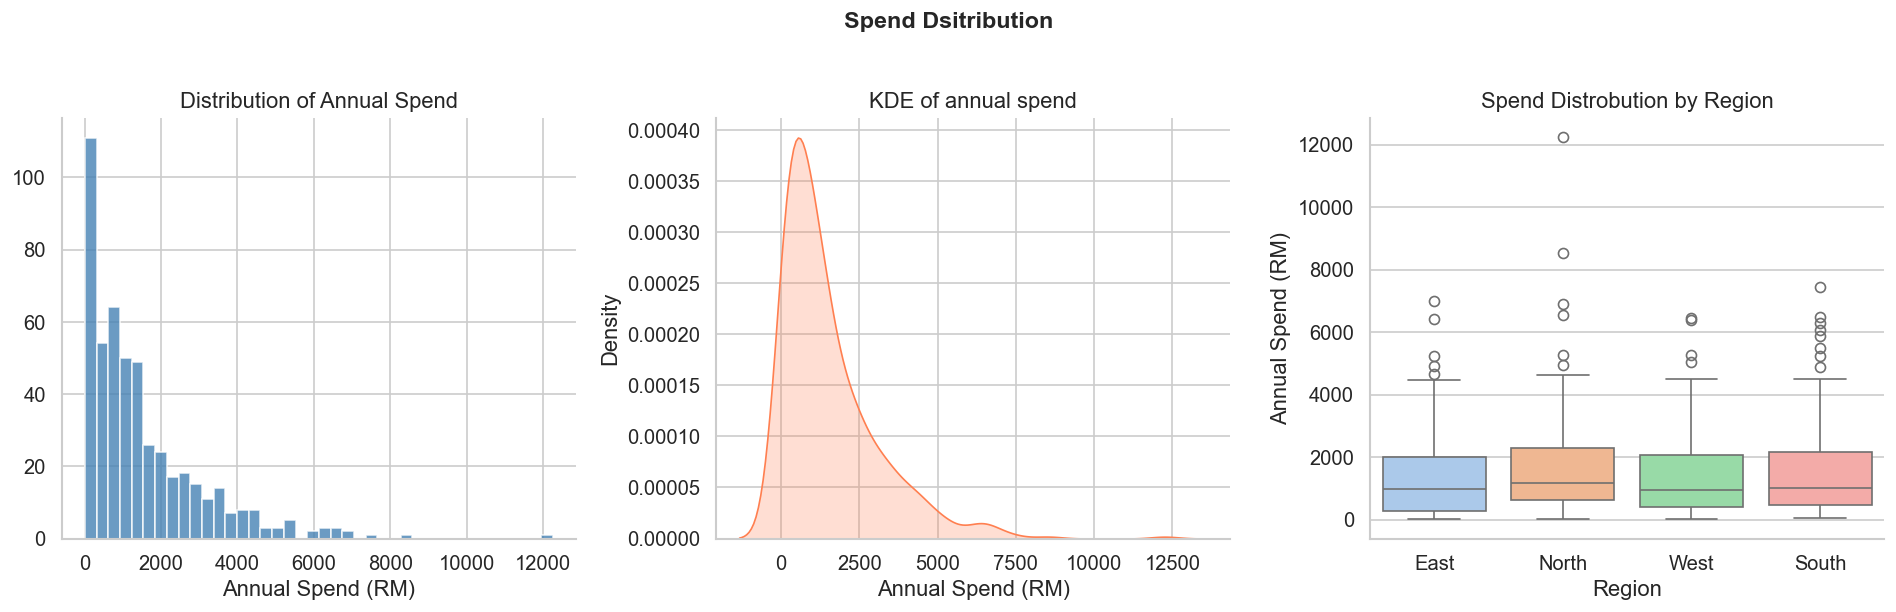

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (16, 5))

# Histogram
axes[0].hist(df['annual_spend'], bins=40, color="steelblue", alpha=0.8, edgecolor='white')
axes[0].set_title("Distribution of Annual Spend")
axes[0].set_xlabel('Annual Spend (RM)')

# KDE plot (smooth distribution)
sns.kdeplot(df['annual_spend'], fill=True, ax=axes[1], color='coral')
axes[1].set_title("KDE of annual spend")
axes[1].set_xlabel("Annual Spend (RM)")

# Box Plot
sns.boxplot(data = df, x='region', y= 'annual_spend', palette='pastel', ax=axes[2])
axes[2].set_title('Spend Distrobution by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Annual Spend (RM)')

plt.suptitle('Spend Dsitribution', fontsize= 14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3. Trend Lines and Time Series

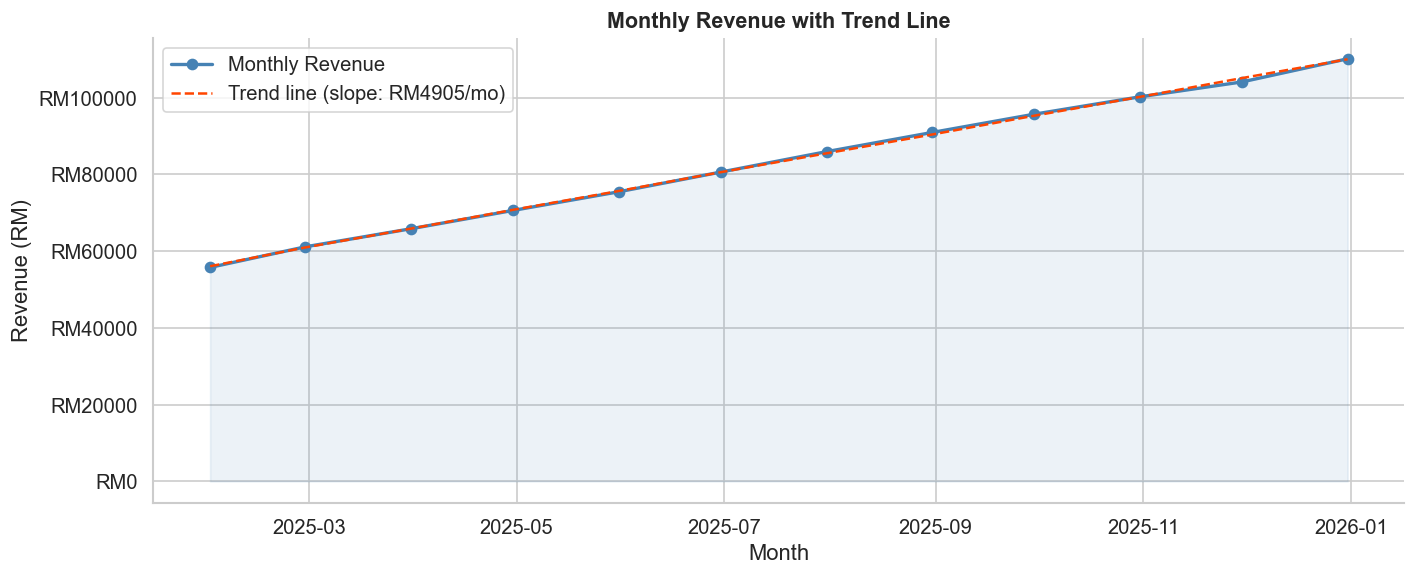

In [8]:
dates = pd.date_range('2025-01-01', periods = 12, freq='ME')
ts_df = pd.DataFrame({
    'date': dates,
    'revenue': np.cumsum(np.random.normal(5000, 800, size=12)) + 50000
})

fig, ax = plt.subplots(figsize= (12, 5))
ax.plot(ts_df['date'], ts_df['revenue'], marker='o', color='steelblue', linewidth=2, label='Monthly Revenue')
ax.fill_between(ts_df['date'], ts_df['revenue'], alpha=0.1, color='steelblue')

# Add Trend Line using polyfit
x_numeric = np.arange(len(ts_df))
slope, intercept = np.polyfit(x_numeric, ts_df['revenue'], deg=1)
trend_line = slope * x_numeric + intercept
ax.plot(ts_df['date'], trend_line, '--', color='orangered', linewidth=1.5, label=f'Trend line (slope: RM{slope:.0f}/mo)')

ax.set_title('Monthly Revenue with Trend Line', fontsize=13, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue (RM)')
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('RM{x:.0f}'))
ax.legend()
plt.tight_layout()
plt.show()

## 4. Comparisons

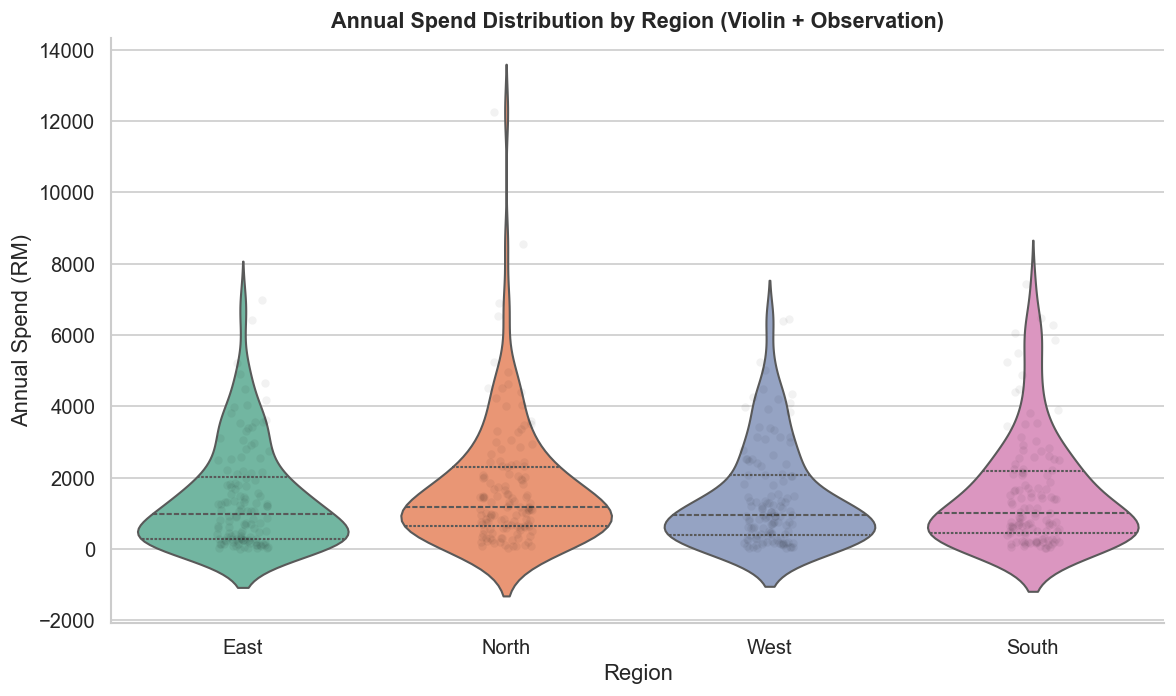

In [9]:
# Side by side comparison: Violin + Strip Plots
fix, ax = plt.subplots(figsize = (10, 6))
sns.violinplot(data=df, x='region', y='annual_spend', palette='Set2', inner='quartile', ax = ax)
sns.stripplot(data=df, x='region', y='annual_spend', color= 'black', alpha=0.05, jitter=True, ax=ax)

ax.set_title("Annual Spend Distribution by Region (Violin + Observation)", fontsize=13, fontweight='bold')
ax.set_xlabel('Region')
ax.set_ylabel('Annual Spend (RM)')
plt.tight_layout()
plt.show()

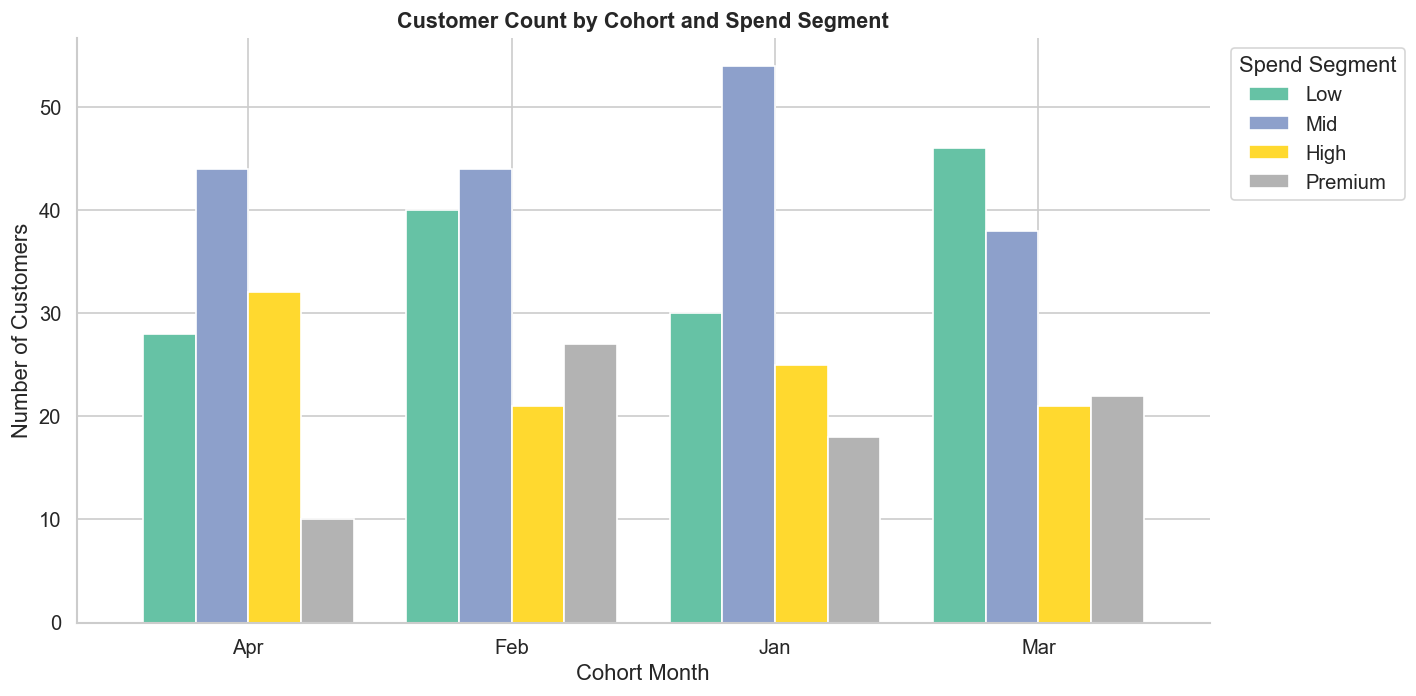

In [10]:
# Grouped bar chart - spend segment by cohort
df['spend_segment'] = pd.cut(df['annual_spend'], bins=[0, 500, 1500, 3000, np.inf], labels=['Low', 'Mid', "High", 'Premium'])

cohort_segment = df.groupby(['cohort_month', 'spend_segment']).size().unstack(fill_value=0)

cohort_segment.plot(kind='bar', figsize=(12, 6), colormap='Set2', edgecolor='white', width=0.8)

plt.title('Customer Count by Cohort and Spend Segment', fontsize=13, fontweight='bold')
plt.xlabel('Cohort Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Spend Segment', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5. ML-Friendly Visualizations: Correlation Heatmap

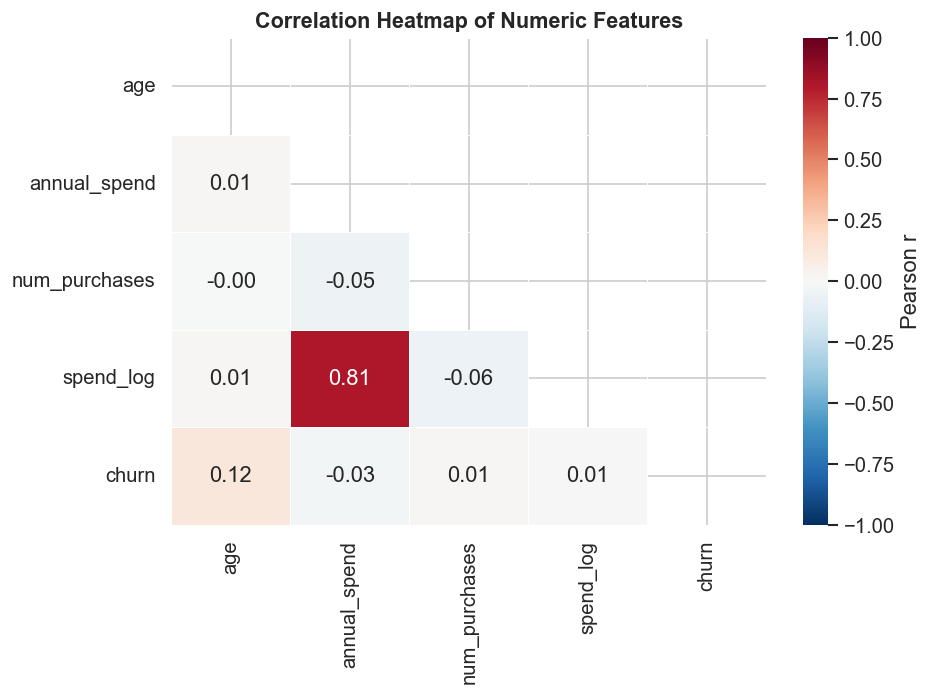

In [11]:
# Correlation heatmap - Critical for feature selection and understanding relationships
numeric_df = df[['age', 'annual_spend', 'num_purchases', 'spend_log', 'churn']]
corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, annot=True, fmt='.2f', mask=mask,
    cmap='RdBu_r', center=0, vmin=-1, vmax=1,
    linewidths=0.5, ax=ax, cbar_kws={'label': 'Pearson r'}
)
ax.set_title('Correlation Heatmap of Numeric Features', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. ML-Friendly Visualiazations: Scatter with Regression

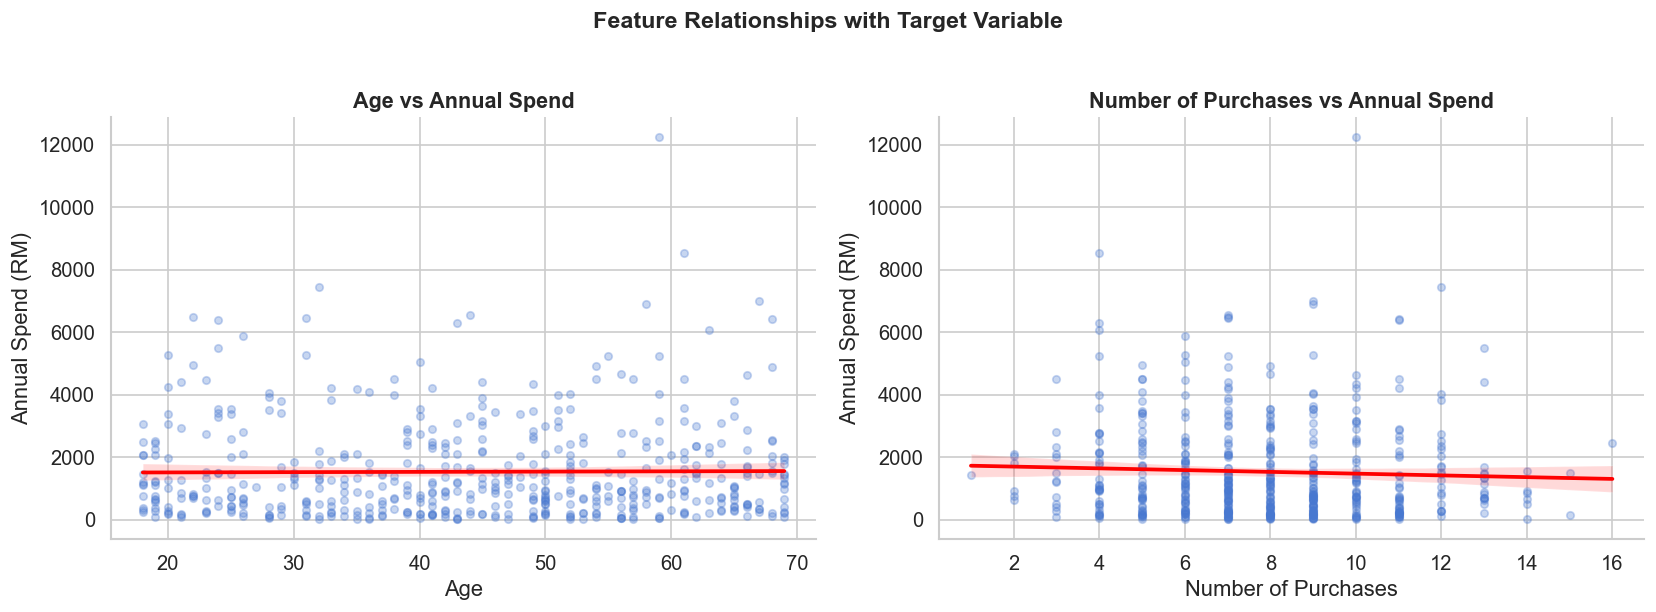

In [13]:
# Scatter plot with regression line - Shows linear relationships 
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Age vs Spend
sns.regplot(data=df, x='age', y='annual_spend', scatter_kws={'alpha':0.3, 's':20}, line_kws={'color':'red'}, ax=ax[0])
ax[0].set_title('Age vs Annual Spend', fontsize=13, fontweight='bold')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Annual Spend (RM)')

# Num Purchases vs Spend
sns.regplot(data=df, x='num_purchases', y='annual_spend', scatter_kws={'alpha':0.3, 's':20}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Number of Purchases vs Annual Spend', fontsize=13, fontweight='bold')
ax[1].set_xlabel('Number of Purchases')
ax[1].set_ylabel('Annual Spend (RM)')

plt.suptitle('Feature Relationships with Target Variable', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. ML-Friendly Visualizations: Feture Importance Plot

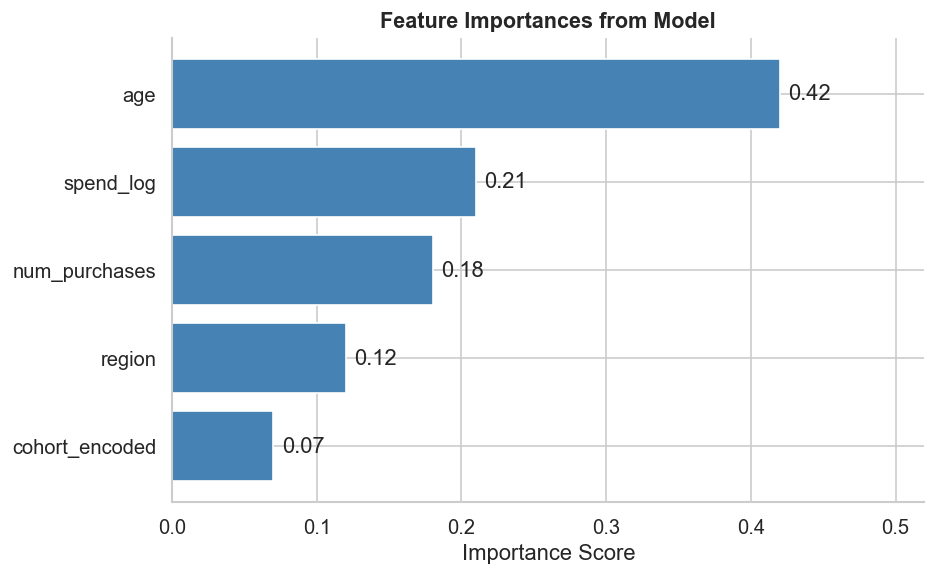

In [14]:
# Simulate feature importances from a model 
features = ['age', 'spend_log', 'num_purchases', 'region', 'cohort_encoded', 'region_encoded']
importances = np.array([0.42, 0.21, 0.18, 0.12, 0.07])
sorted_idx = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh([features[i] for i in sorted_idx], importances[sorted_idx], color='steelblue', edgecolor='white')
ax.bar_label(bars, fmt='%.2f', padding=5)
ax.set_xlim(0, 0.52)
ax.set_title('Feature Importances from Model', fontsize=13, fontweight='bold')
ax.set_xlabel('Importance Score')
plt.tight_layout()
plt.show()


## 8. Pair Plot - Full Feature Overview

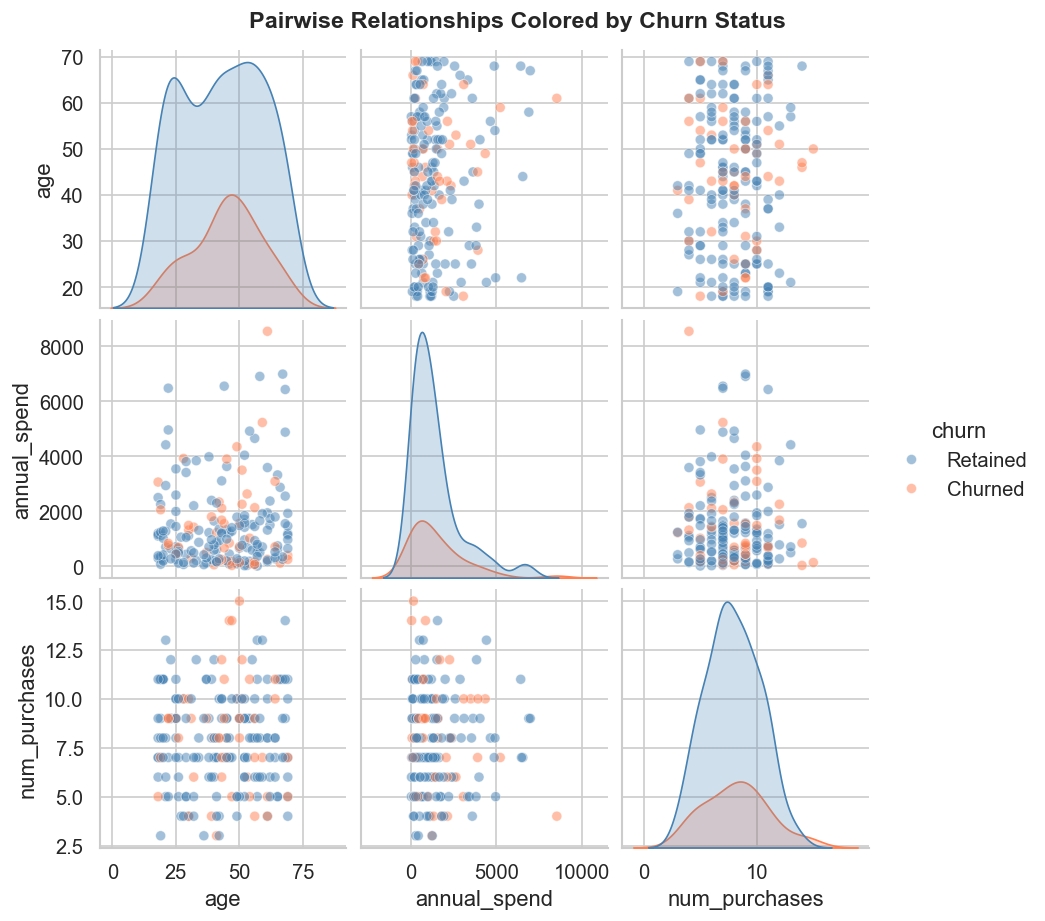

In [17]:
# Pair Plot: Visualiz all pairwise relationships colored by churn status

pair_data = df[['age', 'annual_spend', 'num_purchases', 'churn']].sample(200, random_state=42)  # Sample for better performance
pair_data['churn'] = pair_data['churn'].map({0: 'Retained', 1: 'Churned'})

g = sns.pairplot(pair_data, hue='churn', palette={'Retained': 'steelblue', 'Churned': 'coral'}, diag_kind='kde', plot_kws={'alpha':0.5})
g.fig.suptitle('Pairwise Relationships Colored by Churn Status', fontsize=14, fontweight='bold', y=1.02)
plt.show()